## OPTIMIZING USING GRADIENT DESCENT

In [52]:
import pandas as pd
data = pd.read_excel("Data_Gradient.xlsx",sheet_name="Sheet1")

In [53]:
X = data["X"]
Y = data["Final Y"]

In [54]:
X[:4],Y[:4]

(0    200
 1     75
 2     90
 3     19
 Name: X, dtype: int64,
 0    1113
 1     584
 2     617
 3     278
 Name: Final Y, dtype: int64)

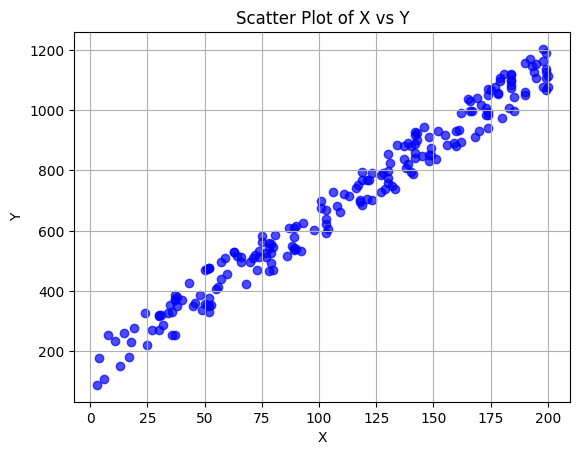

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the grid for better visualization
plt.grid(True)

# Showing the plot
plt.show()

In [57]:

def f(x,w1=1,w2=1):
    return w1*x + w2

def loss(w1,w2):

    return sum(((w1*X + w2)-Y)**2)/len(X)


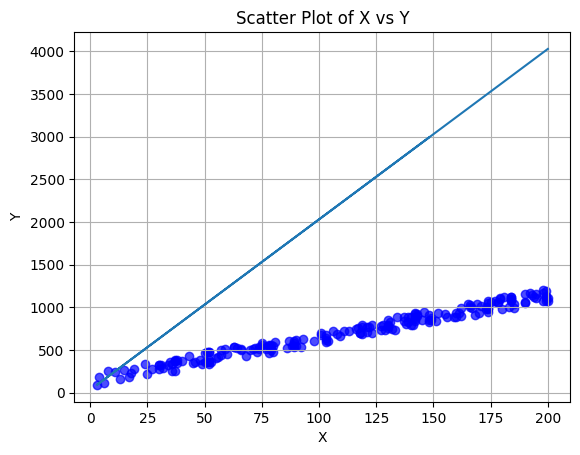

In [74]:
w1=20
w2=30
ypred =list(map(lambda x: f(x, w1, w2), X))
plt.scatter(X, Y, color='blue', alpha=0.7)
plt.plot(X,ypred)
# Adding titles and labels
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the grid for better visualization
plt.grid(True)

# Showing the plot
plt.show()

In [75]:
print(loss(w1,w2))
    

3148824.331707317


In [76]:
h = 0.0000001

der_loss_w1 = (loss(w1=w1+h,w2=w2) - loss(w1=w1,w2=w2))/h
der_loss_w2 = (loss(w1=w1,w2=w2+h) - loss(w1=w1,w2=w2))/h

In [77]:
der_loss_w1,der_loss_w2

(443598.95400702953, 3120.89454382658)

In [79]:
learning_rate = 1e-7
h = 0.0000001
w1=1
w2=2

In [80]:

for i in range(10000):
    der_loss_w1 = (loss(w1=w1+h,w2=w2) - loss(w1=w1,w2=w2))/h
    der_loss_w2 = (loss(w1=w1,w2=w2+h) - loss(w1=w1,w2=w2))/h

    w1 =w1-learning_rate*der_loss_w1
    w2 =w2 -learning_rate*der_loss_w2
    print(loss(w1,w2))


398742.928697891
396289.81069072324
393852.02274207684
391429.46907194715
389022.05446042184
386629.68430751027
384252.2645935869
381889.70189421525
379541.9033583202
377208.77673173905
374890.2303005072
372586.172985072
370296.5142217463
368021.1640387751
365760.03301807935
363513.03229176597
361280.0735652812
359061.0690790121
356855.931639938
354664.57456668443
352486.9117638434
350322.8576497018
348172.3271790796
346035.2358402315
343911.49965150974
341801.0351499927
339703.75940532255
337619.58998294355
335548.44499130483
333490.24303712853
331444.9032223069
329412.34518265084
327392.489043281
325385.2554240501
323390.56544494984
321408.34071477817
319438.50333671103
317480.975905115
315535.6814785111
313602.54362548824
311681.48637301504
309772.4342200478
307875.31215084833
305990.0456079676
304116.56050555775
302254.7832189295
300404.6405813879
298566.0598818665
296738.96887803037
294923.29575402767
293118.96917301265
291325.9182117772
289544.0724206525
287773.3617740146
286013.

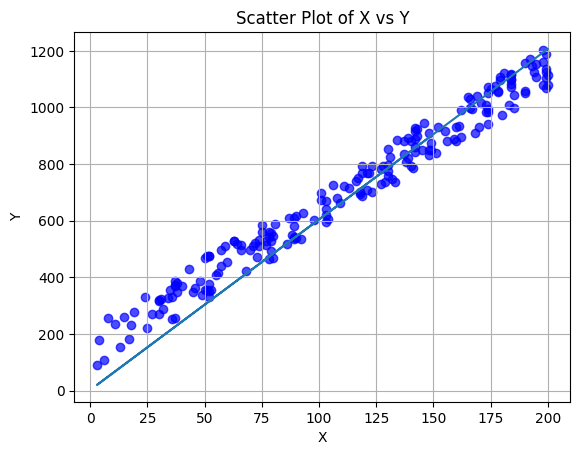

In [81]:
ypred = list(map(lambda x: f(x, w1, w2), X))
plt.scatter(X, Y, color='blue', alpha=0.7)
plt.plot(X,ypred)
# Adding titles and labels
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the grid for better visualization
plt.grid(True)

# Showing the plot
plt.show()

In [82]:
w1,w2

(6.023859962834649, 2.09437354072179)

In [103]:
f(230,w1,w2)

1387.582164992691

In [83]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_excel("Data_Gradient.xlsx", sheet_name="Sheet1")
X = data["X"].values.reshape(-1, 1)
Y = data["Final Y"].values.reshape(-1, 1)

# Normalize data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
Y_normalized = scaler_Y.fit_transform(Y)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
Y_tensor = torch.tensor(Y_normalized, dtype=torch.float32)

# Define a neural network model with one hidden layer
class NeuralNetworkModel(nn.Module):
    def __init__(self):
        super(NeuralNetworkModel, self).__init__()
        self.hidden = nn.Linear(1, 32)  # Hidden layer with 16 neurons
        self.relu = nn.ReLU()           # Activation function
        self.output = nn.Linear(32, 1)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Instantiate the model
model = NeuralNetworkModel()

# Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20000
for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(X_tensor)
    
    # Compute and print loss
    loss = criterion(y_pred, Y_tensor)
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch ==2 :
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, print model parameters
print(f"Model parameters after training: {list(model.parameters())}")

# Predicting values using the trained model
with torch.no_grad():  # No need to calculate gradients during inference
    y_pred_normalized = model(X_tensor).numpy()

# Inverse transform predictions to original scale
y_pred = scaler_Y.inverse_transform(y_pred_normalized)

# Convert predictions to a list
ypred = y_pred.flatten().tolist()

print("Predictions:", ypred)


Epoch [3/20000], Loss: 0.6826
Epoch [1000/20000], Loss: 0.0282
Epoch [2000/20000], Loss: 0.0277
Epoch [3000/20000], Loss: 0.0273
Epoch [4000/20000], Loss: 0.0270
Epoch [5000/20000], Loss: 0.0267
Epoch [6000/20000], Loss: 0.0264
Epoch [7000/20000], Loss: 0.0262
Epoch [8000/20000], Loss: 0.0260
Epoch [9000/20000], Loss: 0.0258
Epoch [10000/20000], Loss: 0.0256
Epoch [11000/20000], Loss: 0.0254
Epoch [12000/20000], Loss: 0.0253
Epoch [13000/20000], Loss: 0.0252
Epoch [14000/20000], Loss: 0.0250
Epoch [15000/20000], Loss: 0.0249
Epoch [16000/20000], Loss: 0.0248
Epoch [17000/20000], Loss: 0.0248
Epoch [18000/20000], Loss: 0.0247
Epoch [19000/20000], Loss: 0.0246
Epoch [20000/20000], Loss: 0.0245
Model parameters after training: [Parameter containing:
tensor([[-0.4404],
        [ 0.2941],
        [ 0.1577],
        [ 0.4011],
        [-0.2862],
        [-0.9493],
        [-0.8270],
        [ 0.4851],
        [-0.8140],
        [-0.1195],
        [ 0.8226],
        [ 0.0050],
        [-0.658

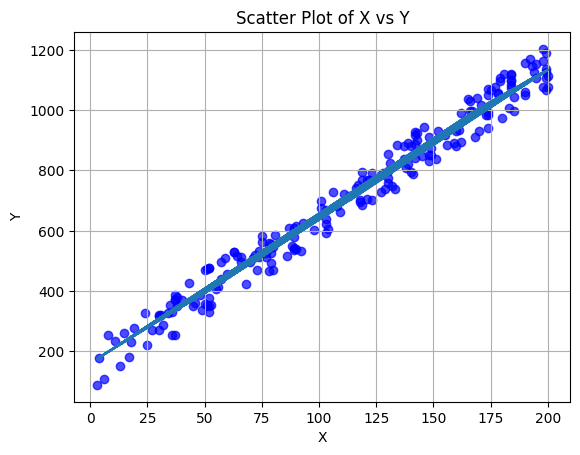

In [84]:

plt.scatter(X, Y, color='blue', alpha=0.7)
plt.plot(X,ypred)
# Adding titles and labels
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the grid for better visualization
plt.grid(True)

# Showing the plot
plt.show()

In [51]:
x_new = 75
x_new_normalized = scaler_X.transform([[x_new]])

# Check the normalized input
print(f"Normalized input for {x_new}: {x_new_normalized}")

# Step 2: Convert the normalized input to a PyTorch tensor
x_new_tensor = torch.tensor(x_new_normalized, dtype=torch.float32)

# Step 3: Use the trained model to predict the output
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_new_pred_normalized = model(x_new_tensor)

# Check the model's normalized prediction
print(f"Normalized prediction for input {x_new}: {y_new_pred_normalized.item()}")

# Step 4: Inverse transform the output to get the prediction in the original scale
y_new_pred = scaler_Y.inverse_transform(y_new_pred_normalized.numpy().reshape(-1, 1))

print(f"Prediction for input {x_new}: {y_new_pred.flatten()[0]}")

Normalized input for 75: [[-0.65374116]]
Normalized prediction for input 75: -0.692464292049408
Prediction for input 75: 507.8652038574219


In [49]:
X[:2],Y[:2]

(array([[200],
        [ 75]], dtype=int64),
 array([[1113],
        [ 584]], dtype=int64))

## Creating a generation model without any training

- Read the name data set
- convert to characters
- generate till end of text


In [2]:
import random
random.seed(10)
data = open('names.txt',"r").read().splitlines()
characters = "".join( sorted(list(set("".join(data)))))
characters= "."+characters
def generatetext(characters):
    text = ""
    probability = [1/len(characters)]* len(characters)
    while True:

        char = random.choices(characters,probability)[0]
        text += char
        if char == ".":
            break
    print(text)

for i in range(20):
    generatetext(characters)

okoeuvqdnhfyzawpjgrlrqctzzpa.
cyhixhnkaovdfk.
mvqnwdojpctbduykkfgpdcldqvtlik.
shhblojwrfnxnpamljkonmdkzk.
.
nabblzmlkmlsxrkqxdfprqovluykwswaxtyzgrcpxeibeebzwltrnkqngippepwwqakbafltpgrmmgkismlllrsujuzzsavv.
hhspgedbuyetyeokzw.
evonutyharaowjpddpwz.
xmijoicwspszdvviolekdyeqozuijaahyadqieyapkiedjtltwdwokmxjbycbshgqxixppn.
drrbqlojeizewnbu.
vixsipzdegvffpokn.
.
.
atzcj.
kqpxnajli.
pmsiagdldbncbcsuuoqtkmsqpqnehrkwjrchvdp.
plxvtirdmjlgenqoyodqhyclrznjtuxsczykqvxsbailhttjreyfdjwprvjyzntwocqlwe.
ddjeiodmi.
rmtwaslwcvkblwajb.
vnoxbytvvj.


### Now we train the data with probabilities of occurence.

if "a" coming first what is the probabilty on next character is appearing in the data


In [19]:
import numpy as np
#N = np.random.rand(27,27)
N= np.zeros((27,27))

In [20]:

stoi = {k:v for k,v in enumerate(characters)}
itos = {v: k for k, v in stoi.items()}

In [21]:
itos

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

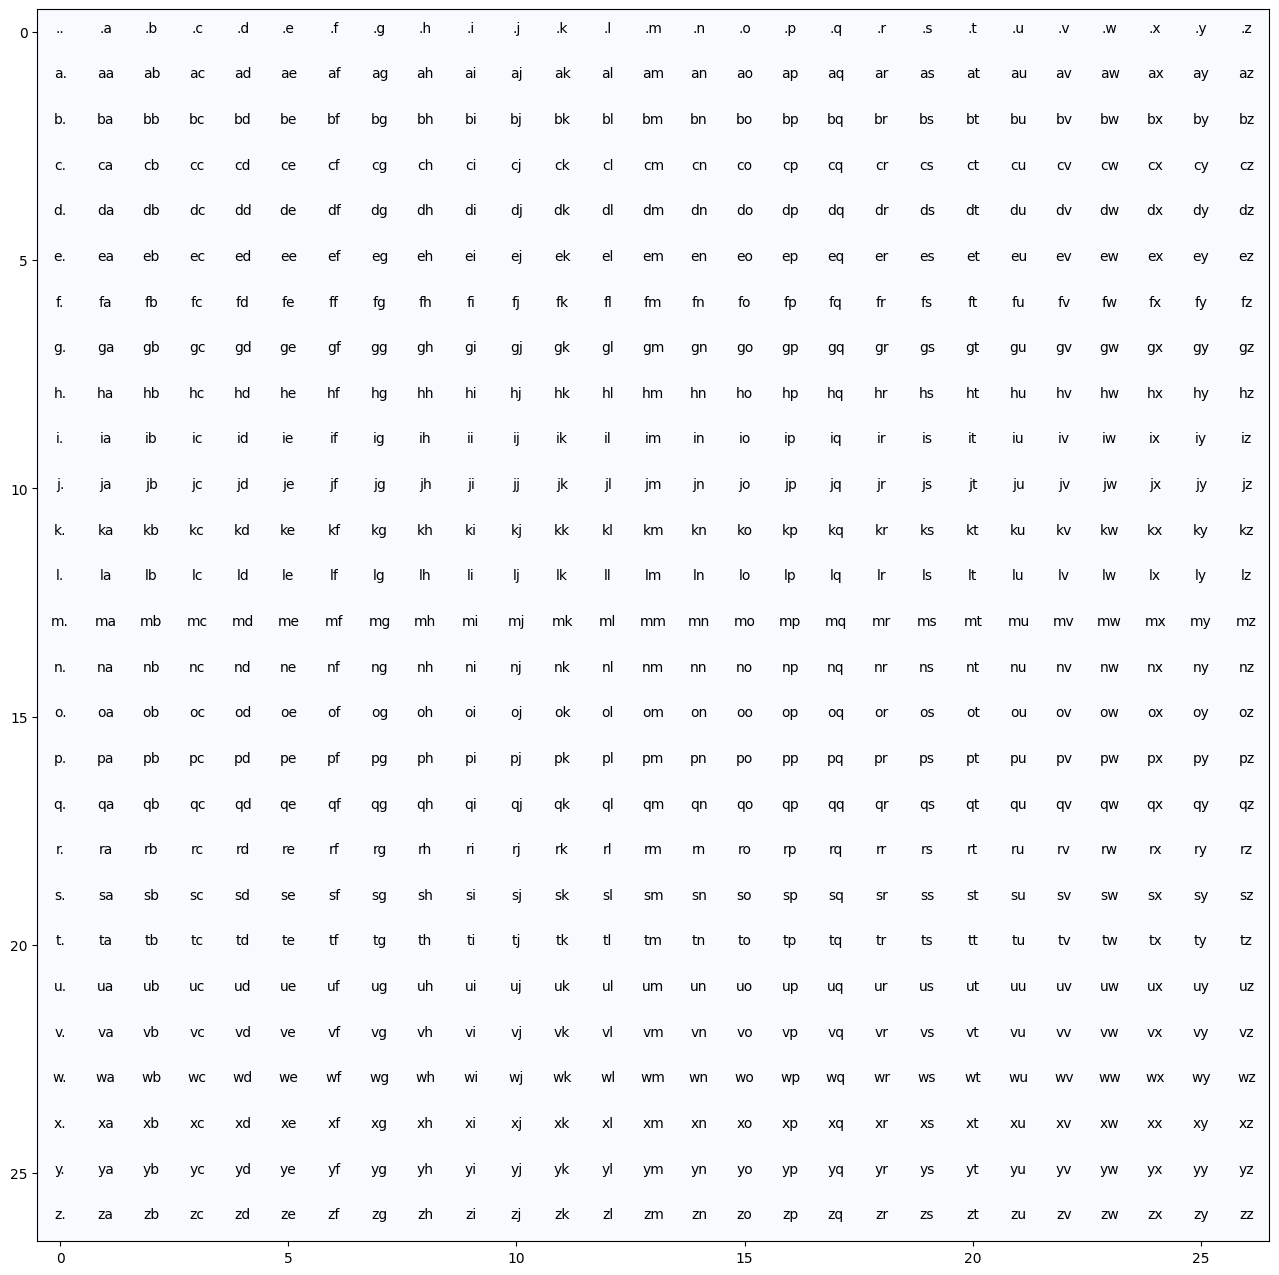

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')

for i in range(len(N)):
    for j in range(len(N)):
 
        plt.text(j,i,stoi[i]+stoi[j],ha="center")


In [23]:
for i in data:
    chs = ["." ]+ list(i) + ["." ]
    for k,v in zip(chs,chs[1:]):
        ix = itos[k]
        iy = itos[v]
        N[ix,iy]+=1
    

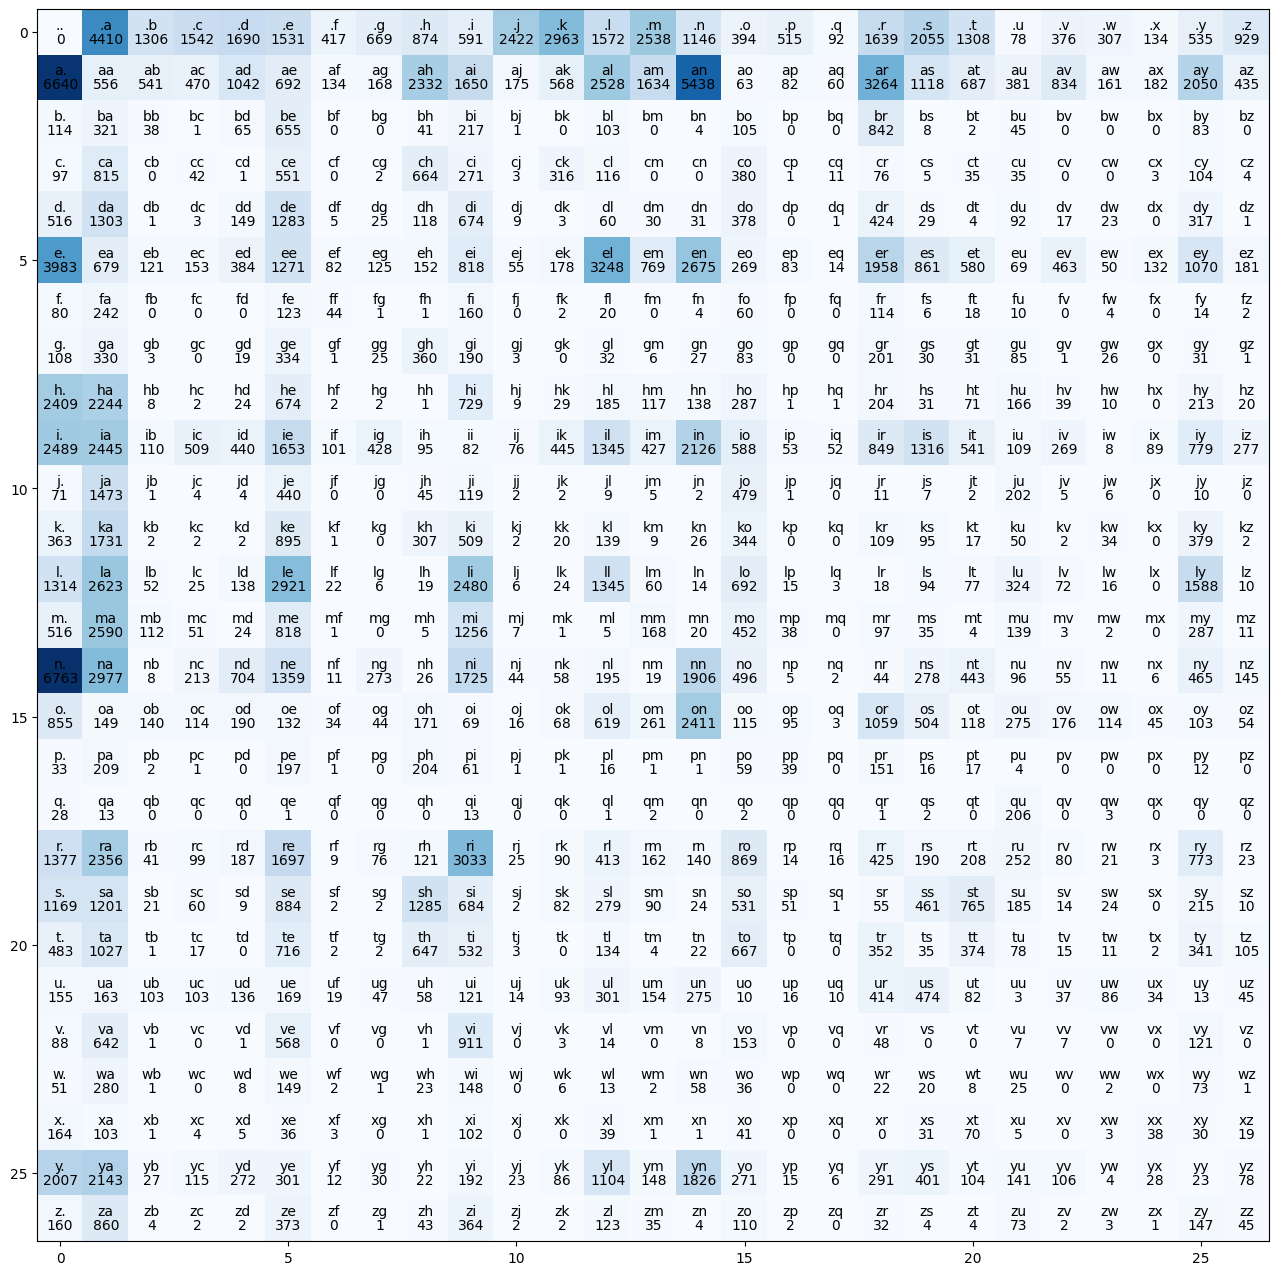

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')

for i in range(len(N)):
    for j in range(len(N)):
        plt.text(j,i,int(N[i,j]),ha="center",va="top")
        plt.text(j,i,stoi[i]+stoi[j],ha="center",va="bottom")


In [20]:
N.shape

(27, 27)

In [21]:
N.sum()

np.float64(228146.0)

In [25]:
N.sum(axis=1,keepdims=True).shape

(27, 1)

In [26]:
N.sum(axis=1,keepdims=True)

array([[32033.],
       [33885.],
       [ 2645.],
       [ 3532.],
       [ 5496.],
       [20423.],
       [  905.],
       [ 1927.],
       [ 7616.],
       [17701.],
       [ 2900.],
       [ 5040.],
       [13958.],
       [ 6642.],
       [18327.],
       [ 7934.],
       [ 1026.],
       [  272.],
       [12700.],
       [ 8106.],
       [ 5570.],
       [ 3135.],
       [ 2573.],
       [  929.],
       [  697.],
       [ 9776.],
       [ 2398.]])

In [27]:
P = (N+1)/N.sum(axis=1,keepdims=True)

In [28]:
P.shape

(27, 27)

In [29]:
P

array([[3.12178066e-05, 1.37701745e-01, 4.08016733e-02, 4.81690756e-02,
        5.27893110e-02, 4.78256798e-02, 1.30490432e-02, 2.09159304e-02,
        2.73155808e-02, 1.84809415e-02, 7.56407455e-02, 9.25295789e-02,
        4.91056098e-02, 7.92620111e-02, 3.58068242e-02, 1.23310336e-02,
        1.61083882e-02, 2.90325602e-03, 5.11972029e-02, 6.41838104e-02,
        4.08641089e-02, 2.46620672e-03, 1.17691131e-02, 9.61508444e-03,
        4.21440390e-03, 1.67327444e-02, 2.90325602e-02],
       [1.95986425e-01, 1.64379519e-02, 1.59952781e-02, 1.38999557e-02,
        3.07805814e-02, 2.04515272e-02, 3.98406375e-03, 4.98745758e-03,
        6.88505238e-02, 4.87236240e-02, 5.19403866e-03, 1.67920909e-02,
        7.46347942e-02, 4.82514387e-02, 1.60513502e-01, 1.88874133e-03,
        2.44946141e-03, 1.80020658e-03, 9.63553195e-02, 3.30234617e-02,
        2.03039693e-02, 1.12734248e-02, 2.46421721e-02, 4.78087649e-03,
        5.40061974e-03, 6.05282573e-02, 1.28670503e-02],
       [4.34782609e-02

In [31]:
P[1,1]

np.float64(0.016437951896119227)

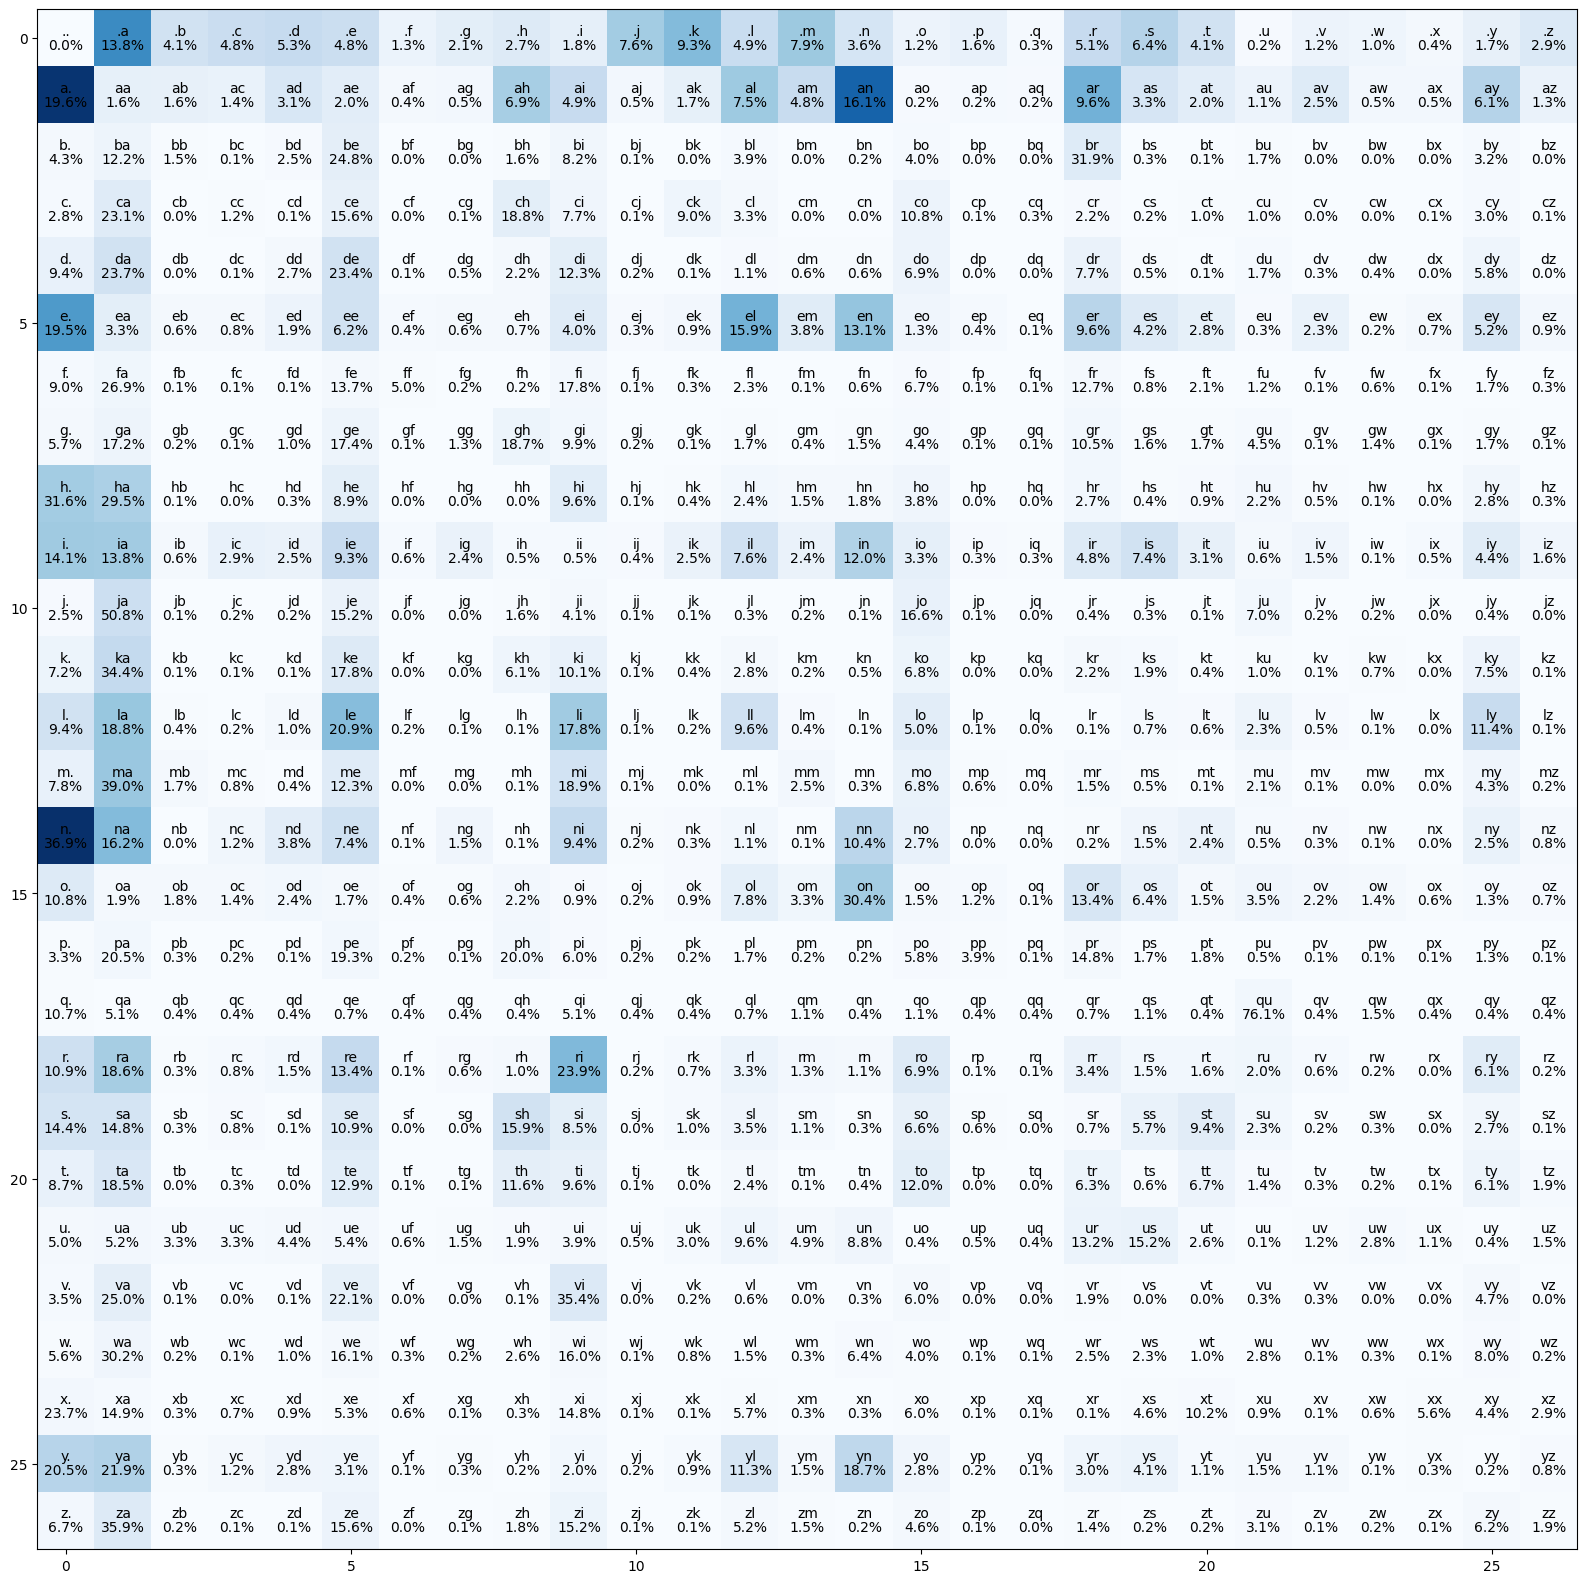

In [79]:
plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')

for i in range(len(N)):
    for j in range(len(N)):
        plt.text(j,i,str(round(P[i,j]*100,1))+"%",ha="center",va="top",fontdict={'size':10})
        plt.text(j,i,stoi[i]+stoi[j],ha="center",va="bottom")


In [36]:
N[0]

array([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,
        591., 2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92.,
       1639., 2055., 1308.,   78.,  376.,  307.,  134.,  535.,  929.])

Now from above let's generate the model

In [75]:
random.seed(10)
for i in range(2):

    out = []
    #will start the word with "."
    ix = 0
    while True:
        p= P[ix]
        ix = random.choices(list(map(lambda x: x, range(0, 27))),p)[0]
        print(ix,"--------->",stoi[ix])
        out.append(stoi[ix])
    
        if stoi[ix]==".":
            break

    print("".join(out))


11 ---------> k
5 ---------> e
13 ---------> m
1 ---------> a
18 ---------> r
15 ---------> o
14 ---------> n
0 ---------> .
kemaron.
11 ---------> k
1 ---------> a
4 ---------> d
25 ---------> y
26 ---------> z
0 ---------> .
kadyz.


In [86]:

random.seed(10)
for i in range(10):

    out = []
    #will start the word with "."
    ix = 0
    while True:
        p= P[ix]
        ix = random.choices(list(map(lambda x: x, range(0, 27))),p)[0]
        out.append(stoi[ix])
    
        if stoi[ix]==".":
            break

    print("".join(out))

kemaron.
kadyz.
sieenangaryupa.
ayaholif.
lsabe.
koncochan.
r.
brycedan.
alannleif.
n.


In [ ]:
# Now train this using neural net
# instead of numpy will use numpy

# ------------------------------

# Under stand the likelihood function


# Log likelihood is a measure used to evaluate how well as statistical model fits a set of observations. It's derived from the likelihood function, which represents the probability of the observed
# data given a set of parameters in a model




In [102]:
log_likelihood = 0.0
n = 0
for i in ["elizabeth"]:
    chs = ['.'] + list(i) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        print(ch1,ch2)
        ix1 = itos[ch1]
        ix2 = itos[ch2]
        print("ix1","----------->",ix1)
        print("ix2","----------->",ix2)
        prob = P[ix1,ix2]
        print("prob --------------------------->",prob)
        logprob = np.log(prob)
        print("log prob --------------------------->",logprob)
        log_likelihood += logprob
        

. e
ix1 -----------> 0
ix2 -----------> 5
prob ---------------------------> 0.04782567976773952
log prob ---------------------------> -3.0401925501083333
e l
ix1 -----------> 5
ix2 -----------> 12
prob ---------------------------> 0.15908534495421828
log prob ---------------------------> -1.8383144600480577
l i
ix1 -----------> 12
ix2 -----------> 9
prob ---------------------------> 0.17774752829918328
log prob ---------------------------> -1.727391115885296
i z
ix1 -----------> 9
ix2 -----------> 26
prob ---------------------------> 0.01570532738263375
log prob ---------------------------> -4.153755300450519
z a
ix1 -----------> 26
ix2 -----------> 1
prob ---------------------------> 0.35904920767306087
log prob ---------------------------> -1.0242958311597288
a b
ix1 -----------> 1
ix2 -----------> 2
prob ---------------------------> 0.015995278146672568
log prob ---------------------------> -4.135461716130568
b e
ix1 -----------> 2
ix2 -----------> 5
prob ---------------------------

In [103]:
log_likelihood

np.float64(-24.175226954551615)

In [104]:
-log_likelihood # Minimize this function is our objective

np.float64(24.175226954551615)

In [15]:
import torch
Xs,Ys =[],[]

for name in data:
    i = ["."] + list(name) + ["."]
    for k,v in zip(i,i[1:]):
        ix = itos[k]
        iy = itos[v]
        Xs.append(ix)
        Ys.append(iy)
        
X =  torch.tensor(Xs)
Y = torch.tensor(Ys)

In [10]:
Xs[:5]

[0, 5, 13, 13, 1]

In [11]:
Ys[:5]

[5, 13, 13, 1, 0]

In [122]:
[stoi[x] for x in Xs]

['.', 'e', 'm', 'm', 'a']

In [124]:
[stoi[y] for y in Ys]

['e', 'm', 'm', 'a', '.']

In [13]:
import torch.nn.functional as F


In [40]:
xenc = F.one_hot(X[:1],num_classes=27).float()

In [33]:
xenc.shape

torch.Size([1, 27])

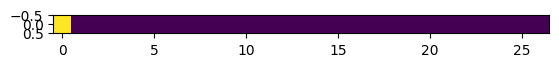

In [34]:
plt.imshow(xenc)

In [35]:
Xs[:4]

[0, 5, 13, 13]

In [36]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g)

In [37]:
W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [38]:
xenc.shape

torch.Size([1, 27])

In [42]:
logits = xenc @ W

In [43]:
logits

tensor([[ 1.5674, -0.2373, -0.0274, -1.1008,  0.2859, -0.0296, -1.5471,  0.6049,
          0.0791,  0.9046, -0.4713,  0.7868, -0.3284, -0.4330,  1.3729,  2.9334,
          1.5618, -1.6261,  0.6772, -0.8404,  0.9849, -0.1484, -1.4795,  0.4483,
         -0.0707,  2.4968,  2.4448]])

In [44]:
logits.shape

torch.Size([1, 27])

In [47]:
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)

In [48]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459]])

In [50]:
# above is the probability returned
Xs[:1]

[0]

In [51]:
Ys[:1]

[5]

In [53]:
# we need to lookinto the probality of the fifth place
# 0.0123 --> from above list
p = probs[Xs[0],Ys[0]]
p

tensor(0.0123)

In [54]:
# loglikelihood
logp = torch.log(p)
nll = -logp

In [55]:
nll

tensor(4.3993)

In [122]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(X, num_classes=27).float()

In [85]:
#now we will do for all the data set in a single go
# and calculate nll


logits = xenc @ W 
counts = logits.exp() 
probs = counts / counts.sum(1, keepdims=True)

In [71]:
probs.shape

torch.Size([228146, 27])

In [86]:
probs[torch.arange(len(X)),Y].log().mean()

tensor(-3.1540, grad_fn=<MeanBackward0>)

In [84]:
loss = -probs[torch.arange(len(X)),Y].log().mean()
W.grad = None # set to zero the gradient
loss.backward()

W.data += -50 * W.grad #update

In [125]:
for k in range(1000):
  
  # forward pass
  xenc = F.one_hot(X, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(len(X)), Y].log().mean() 
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277769088745
2.6253881454467773
2.6139907836914062
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.543415069580078
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.5042612552642822
2.5029289722442627
2.5016605854034424
2.5004522800445557
2.4992990493774414
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129
2.4925124645233154
2.4916954040527344
2.4909095764160156
2.4901537895202637
2.4894261360168457
2.488725423812866
2.4880495071411133
2.4873974323272705
2.4867680072784424
2.48616027832

In [126]:
W.shape

torch.Size([27, 27])

In [120]:
W

tensor([[-4.7127e+00,  2.2054e+00,  9.8841e-01,  1.1545e+00,  1.2462e+00,
          1.1474e+00, -1.5351e-01,  3.1934e-01,  5.8670e-01,  1.9534e-01,
          1.6061e+00,  1.8077e+00,  1.1738e+00,  1.6529e+00,  8.5770e-01,
         -2.1027e-01,  5.7652e-02, -1.6663e+00,  1.2156e+00,  1.4418e+00,
          9.8994e-01, -1.8318e+00, -2.5705e-01, -4.5989e-01, -1.2896e+00,
          9.5764e-02,  6.4774e-01],
        [ 2.2429e+00, -2.3717e-01, -2.6452e-01, -4.0520e-01,  3.9096e-01,
         -1.8350e-02, -1.6601e+00, -1.4340e+00,  1.1965e+00,  8.5059e-01,
         -1.3932e+00, -2.1581e-01,  1.2772e+00,  8.4085e-01,  2.0432e+00,
         -2.4148e+00, -2.1512e+00, -2.4636e+00,  1.5328e+00,  4.6136e-01,
         -2.5602e-02, -6.1514e-01,  1.6830e-01, -1.4765e+00, -1.3539e+00,
          1.0677e+00, -4.8259e-01],
        [ 2.0441e+00,  3.0914e+00,  8.9976e-01, -1.6209e+00,  1.4669e+00,
          3.8078e+00, -1.8038e+00, -1.8614e+00,  9.8095e-01,  2.6968e+00,
         -1.5839e+00, -2.0299e+00,  1.94

In [127]:
random.seed(10)
import numpy as np
for i in range(10):

    out = []
    #will start the word with "."
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
      
        ix = random.choices(list(map(lambda x: x, range(0, 27))),p.detach().numpy()[0])[0]
        out.append(stoi[ix])
    
        if stoi[ix]==".":
            break

    print("".join(out))

kemaron.
kadyz.
sieenangaryupa.
ayaholif.
lsabe.
koncochan.
r.
brycedan.
alannleif.
n.


```
kemaron.
kadyz.
sieenangaryupa.
ayaholif.
lsabe.
koncochan.
r.
brycedan.
alannleif.
n.
```

In [111]:
import numpy as np
p.detach().numpy()[0]

array([0.00068508, 0.13731821, 0.04065594, 0.04799093, 0.05259328,
       0.04764894, 0.01312424, 0.02090021, 0.02724804, 0.01848916,
       0.07537439, 0.09222382, 0.0489237 , 0.0789865 , 0.03568656,
       0.01241705, 0.01614313, 0.00325111, 0.05100713, 0.06394957,
       0.04071807, 0.00284044, 0.01186403, 0.00974838, 0.00449879,
       0.01676016, 0.02895315], dtype=float32)

In [106]:
list(map(lambda x: x, range(0, 27)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [129]:
# Now predicted using neural network and it's matching with the initial model we developed by counting

In [161]:
chars =torch.arange(0,27).view(27)
xenc = F.one_hot(chars, num_classes=27).float()
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
p = counts / counts.sum(1, keepdims=True)


In [168]:
P= p.detach().numpy()

In [171]:
P[1,1]

0.01640844

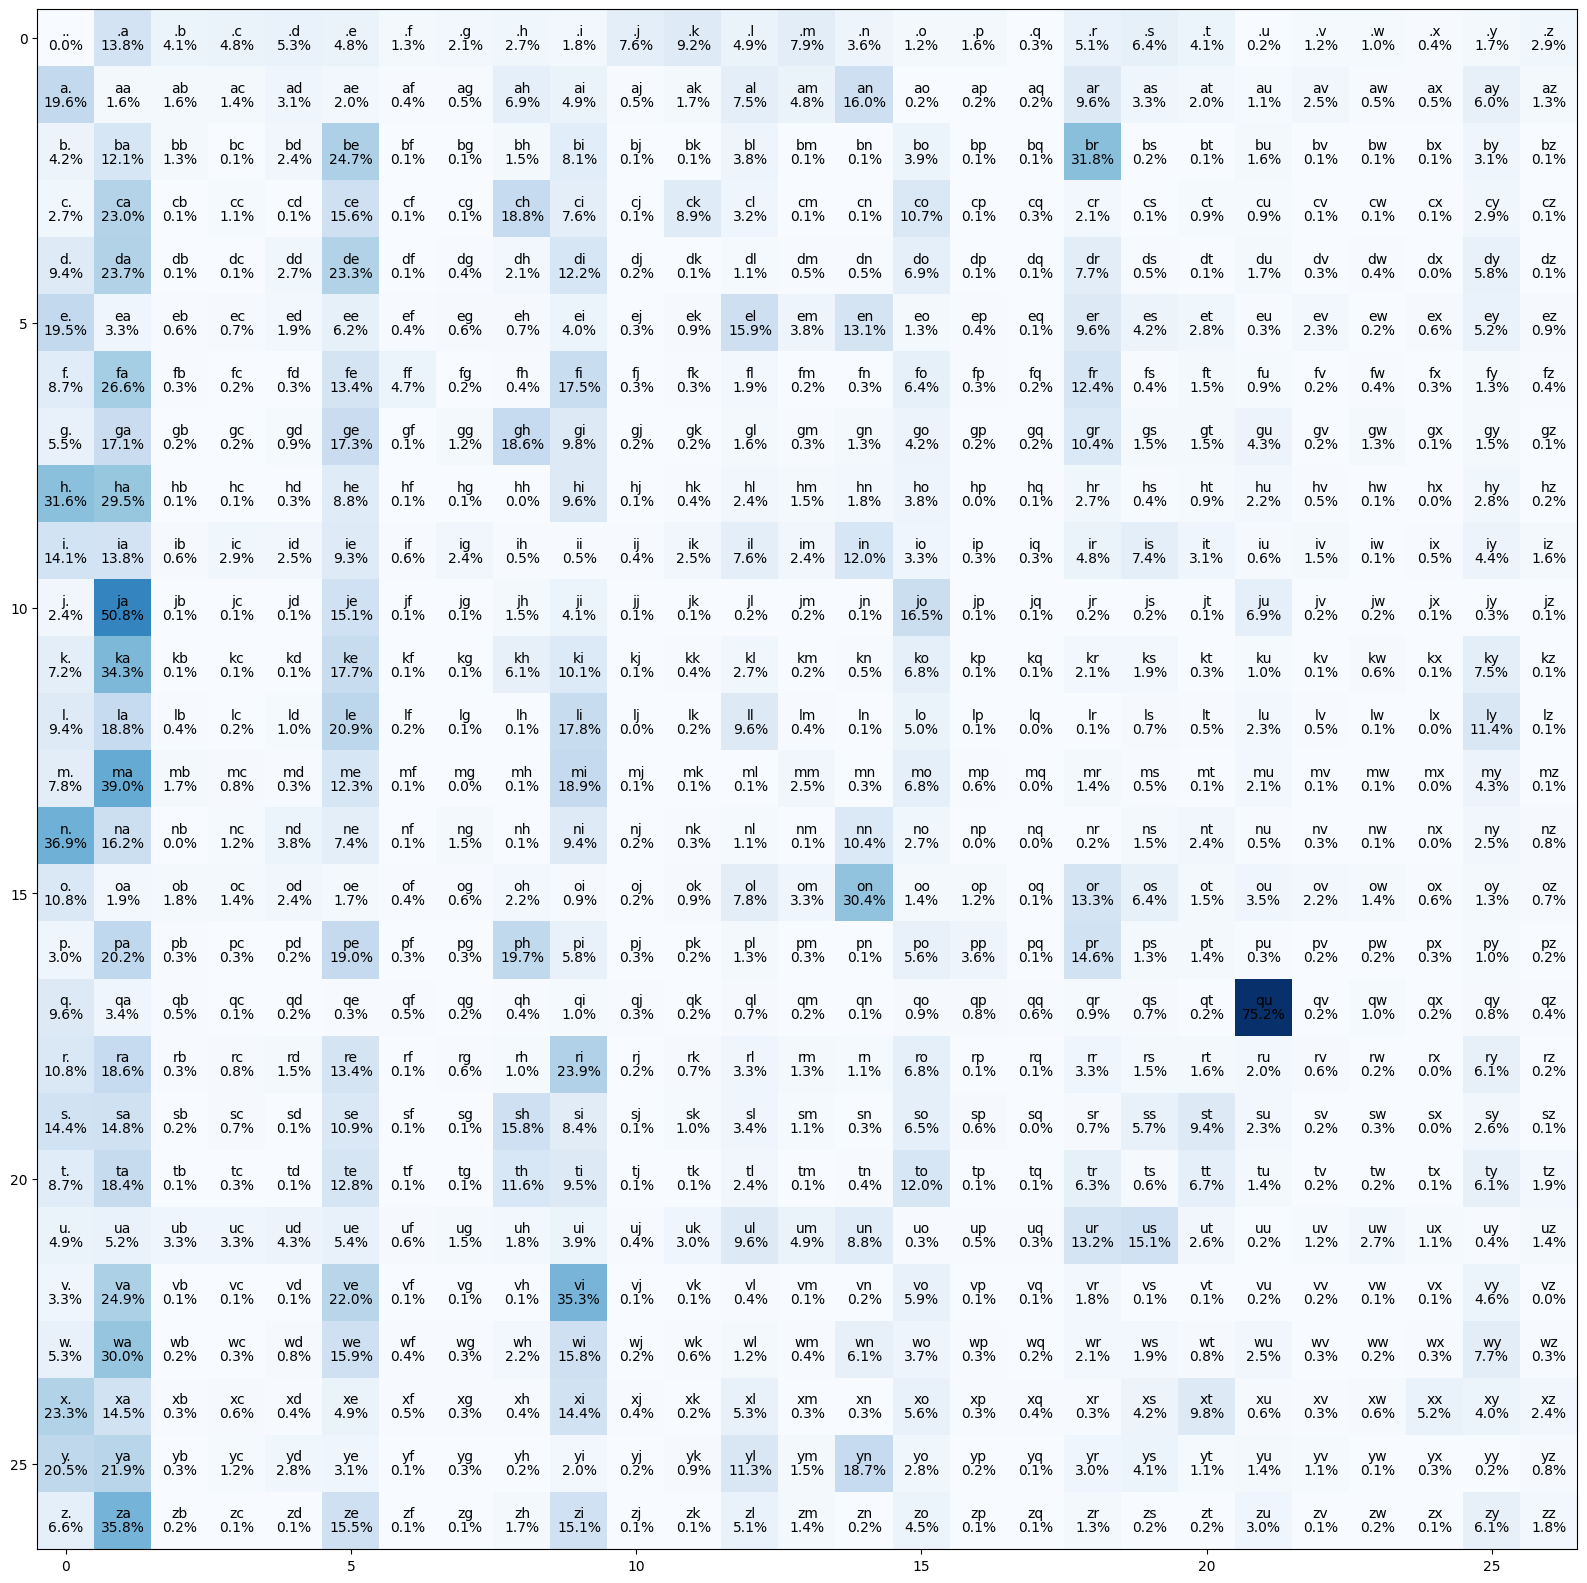

In [174]:
plt.figure(figsize=(20,20))
plt.imshow(P*100,cmap='Blues')

for i in range(len(P)):
    for j in range(len(P)):
        plt.text(j,i,str(round(P[i,j]*100,1))+"%",ha="center",va="top",fontdict={'size':10})
        plt.text(j,i,stoi[i]+stoi[j],ha="center",va="bottom")

tensor([0, 5])

In [152]:
chars.shape

torch.Size([27])

In [85]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        # wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))

0.209729 M parameters
step 0: train loss 4.4116, val loss 4.4022
step 100: train loss 2.6568, val loss 2.6670
step 200: train loss 2.5090, val loss 2.5058
step 300: train loss 2.4197, val loss 2.4338
step 400: train loss 2.3504, val loss 2.3568
step 500: train loss 2.2965, val loss 2.3129
step 600: train loss 2.2410, val loss 2.2502
step 700: train loss 2.2046, val loss 2.2181
step 800: train loss 2.1635, val loss 2.1867
step 900: train loss 2.1251, val loss 2.1519
step 1000: train loss 2.1034, val loss 2.1307
step 1100: train loss 2.0701, val loss 2.1186
step 1200: train loss 2.0380, val loss 2.0800
step 1300: train loss 2.0250, val loss 2.0633
step 1400: train loss 1.9937, val loss 2.0371
step 1500: train loss 1.9697, val loss 2.0298
step 1600: train loss 1.9651, val loss 2.0502
step 1700: train loss 1.9410, val loss 2.0131
step 1800: train loss 1.9090, val loss 1.9955
step 1900: train loss 1.9088, val loss 1.9867
step 2000: train loss 1.8842, val loss 1.9943
step 2100: train loss 1.

In [2]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import tiktoken

# hyperparameters
batch_size = 16  # how many independent sequences will we process in parallel?
block_size = 8  # context length is now 8 tokens (instead of a bigram)
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# Initialize tokenizer from tiktoken
tokenizer = tiktoken.get_encoding("cl100k_base")

# Read text data from a file
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Tokenize the entire text using tiktoken
tokens = tokenizer.encode(text)
vocab_size = tokenizer.n_vocab

# Convert token list to a PyTorch tensor
data = torch.tensor(tokens, dtype=torch.long)

# Train and test splits
n = int(0.9 * len(data))  # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# Data loading function to generate batches
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i + block_size] for i in ix])
    y = torch.stack([data[i + 1:i + block_size + 1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2, -1) * C ** -0.5  # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))  # (B, T, T)
        wei = F.softmax(wei, dim=-1)  # (B, T, T)
        # wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x)  # (B,T,C)
        out = wei @ v  # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Token and position embeddings
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        # Transformer blocks
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)  # Final layer normalization
        self.lm_head = nn.Linear(n_embd, vocab_size)  # Output layer

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # Embedding layers
        tok_emb = self.token_embedding_table(idx)  # (B, T, C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))  # (T, C)
        x = tok_emb + pos_emb  # Combine token and position embeddings
        x = self.blocks(x)  # Transformer blocks
        x = self.ln_f(x)  # Final layer normalization
        logits = self.lm_head(x)  # Output logits

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]  # Crop idx to the last block_size tokens
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]  # Focus on the last time step
            probs = F.softmax(logits, dim=-1)  # Convert to probabilities
            idx_next = torch.multinomial(probs, num_samples=1)  # Sample from distribution
            idx = torch.cat((idx, idx_next), dim=1)  # Append sampled index
        return idx

model = TransformerLanguageModel()
m = model.to(device)
print(sum(p.numel() for p in m.parameters()) / 1e6, 'M parameters')

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):
    # Evaluate loss on train and val sets periodically
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # Sample a batch of data
    xb, yb = get_batch('train')

    # Evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# Generate text from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(tokenizer.decode(m.generate(context, max_new_tokens=200)[0].tolist()))


13.135541 M parameters


c:\Users\sahee\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


step 0: train loss 11.6801, val loss 11.6748
step 100: train loss 7.4108, val loss 7.6365
step 200: train loss 7.2005, val loss 7.4173
step 300: train loss 6.9530, val loss 7.2453
step 400: train loss 6.6835, val loss 6.9933
step 500: train loss 6.4473, val loss 6.8491
step 600: train loss 6.2246, val loss 6.6706
step 700: train loss 6.0530, val loss 6.5323
step 800: train loss 5.9500, val loss 6.4824
step 900: train loss 5.8329, val loss 6.4372
step 1000: train loss 5.7529, val loss 6.3971
step 1100: train loss 5.6529, val loss 6.2849
step 1200: train loss 5.6385, val loss 6.2398
step 1300: train loss 5.5448, val loss 6.1794
step 1400: train loss 5.4805, val loss 6.1756
step 1500: train loss 5.4554, val loss 6.1072
step 1600: train loss 5.4021, val loss 6.1002
step 1700: train loss 5.3802, val loss 6.0666
step 1800: train loss 5.3386, val loss 6.0463
step 1900: train loss 5.2589, val loss 6.0142
step 2000: train loss 5.2652, val loss 5.9865
step 2100: train loss 5.2520, val loss 5.997